# Overfitting plot

In [190]:
import platform
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

from custom_colors import blue_shades

In [14]:
if platform.node() == "INSERT_WORK_LAPTOP_ID":
    OUTPUT_DIR = r"C:\Users\felix.krause\code\uni\master-thesis-text\assets\data_viz"
elif platform.node() == "Felix-PC":
    OUTPUT_DIR = r"C:\Users\Felix\code\uni\UniVie\master-thesis-text\assets\data_viz"
else:
    raise ValueError("Unknown platform")

In [200]:
# Store the plot as pdf
# STORE = False
STORE = True

In [159]:
num_gen = iter(range(100))

In [224]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

from custom_colors import blue_shades
colors = [blue_shades[i] for i in [0, 2, 4]]
# prop_cycle = plt.rcParams['axes.prop_cycle']
# colors = prop_cycle.by_key()['color']

In [244]:
colors

['#B2E8F6', '#43A3DC', '#0F5094']

75


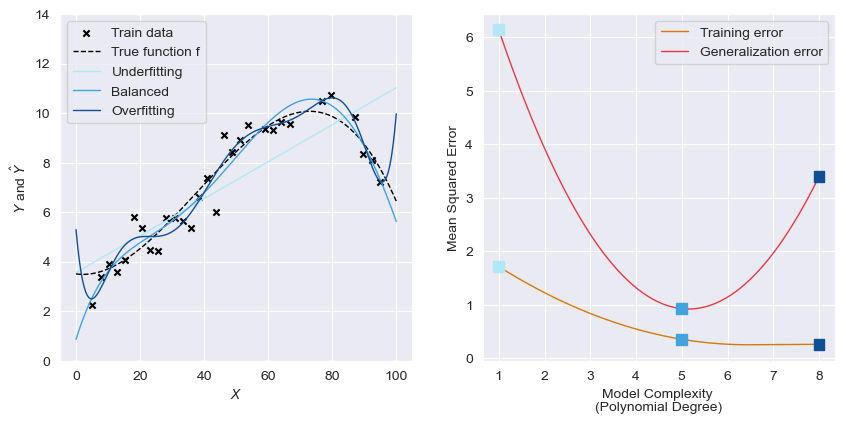

In [246]:
# Data points
seed = next(num_gen)
print(seed)
np.random.seed(9)
X = np.linspace(0, 100, 40)

f = lambda x: 3.5 - 0.00003725 * x ** 3 + 0.0042 * x ** 2 - 0.0181 * x

# Random 30 samples for train
X_train = np.random.choice(X, 30, replace=False)
Y_train = f(X_train) + np.random.normal(0, 0.6, len(X_train))

# Remaining samples for test
X_test = np.array([x for x in X if x not in X_train])
Y_test = f(X_test) + np.random.normal(0, 0.6, len(X_test))

flexibility = [1, 5, 8]

# Polynomial fitting and MSE calculation
mse_train = []
mse_test = []
polynomial_fits = []

x_range = np.linspace(0, 100, 200)

for degree in flexibility:
    # Fit polynomial model of degree `degree`
    model = np.poly1d(np.polyfit(X_train, Y_train, degree))
    polynomial_fits.append(model(x_range))
    
    # Compute MSE for training and testing sets
    train_error = np.mean((model(X_train) - Y_train) ** 2)
    test_error = np.mean((model(X_test) - Y_test) ** 2)
    mse_train.append(train_error)
    mse_test.append(test_error)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 4.5))

# Left: Under-, balanced-, and overfitting curves
axs[0].scatter(X_train, Y_train, color="black", label="Train data", s=20, marker="x")
axs[0].plot(x_range, f(x_range), color="black", label="True function f", lw=1, ls="--")
axs[0].plot(x_range, polynomial_fits[0], label=f"Underfitting", lw=1, color=colors[0])
axs[0].plot(x_range, polynomial_fits[1], label=f"Balanced", lw=1, color=colors[1])
axs[0].plot(x_range, polynomial_fits[2], label=f"Overfitting", lw=1, color=colors[2])
axs[0].set_xlabel("$X$")
axs[0].set_ylabel("$Y$ and $\hat{Y}$")
# give more space on y-axis
axs[0].set_ylim(0, 14)
axs[0].legend()
# axs[0].set_title("Under-, Balanced-, and Overfitting")

# Right: MSE vs. flexibility
x_smooth = np.linspace(min(flexibility), max(flexibility), 200)

# Create smooth curves using interpolation
train_spline = make_interp_spline(flexibility + [100], mse_train + [0], k=2)
test_spline = make_interp_spline(flexibility, mse_test, k=2)
mse_train_smooth = train_spline(x_smooth)
mse_test_smooth = test_spline(x_smooth)

axs[1].plot(x_smooth, mse_test_smooth, color="#E63946", label="Generalization error", lw=1)
axs[1].plot(x_smooth, mse_train_smooth, color='#D17B0F', label="Training error", lw=1)
axs[1].scatter(flexibility, mse_train, color=colors[0:3], s=60, marker="s", zorder=10)
axs[1].scatter(flexibility, mse_test, color=colors[0:3], s=60, marker="s", zorder=10)
axs[1].set_xlabel("Model Complexity \n(Polynomial Degree)")
axs[1].set_ylabel("Mean Squared Error")
axs[1].legend()
# axs[1].set_title("Training vs. Testing Error")

# plt.tight_layout()

if STORE:
    plt.savefig(OUTPUT_DIR + "/under-overfitting.pdf", format="pdf", bbox_inches="tight")
    
plt.show()
# 0, 9, 25